In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import time
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.0


In [2]:
iris=load_iris()
X=iris.data[:,(2,3)] #petal length, petal width
y=(iris.target==0).astype(np.int)

per_clf=Perceptron()
per_clf.fit(X,y)

y_pred=per_clf.predict([[2,0.5]])
print(y_pred)

[0]


C:\Users\Daniel\anaconda3\envs\py37ml\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full), (X_test,y_test)=fashion_mnist.load_data()
print(X_train_full.shape)
print(X_train_full.dtype)


4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
uint8


Coat


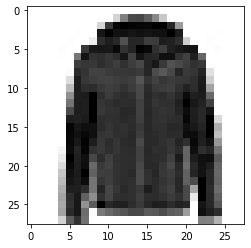

In [5]:
X_valid,X_train=X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
             "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names[y_train[0]])

plt.imshow(X_train[0],cmap="gray_r")



In [7]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) #lub keras.layers.Inputlayer(input_shape=[28,28])
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax")) #klasy sie wykluczaja wiec softmax nie logistic

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

In [11]:
hidden1=model.layers[1]
print(hidden1.name)
print(model.get_layer('dense') is hidden1)

dense
True


In [12]:
weights, biases=hidden1.get_weights()
print(weights.shape)
print(biases.shape)
print(weights)
print(biases)

(784, 300)
(300,)
[[-4.3186478e-02 -6.6373028e-02 -1.1457734e-02 ... -2.6690591e-02
   6.6147149e-03  3.9686464e-02]
 [-5.5292405e-02 -4.6801023e-02 -6.0493872e-03 ... -1.8362314e-02
  -2.3834337e-02  4.8230290e-02]
 [-6.3464388e-02 -4.2548731e-02  6.5406412e-04 ... -1.9786950e-02
  -2.1670654e-02  4.8046328e-02]
 ...
 [ 2.6664093e-02 -5.6002855e-02 -2.4744216e-02 ...  2.9790707e-02
  -1.1614464e-02 -4.0050212e-02]
 [ 4.5899995e-02  8.8974833e-05 -5.9714377e-02 ...  3.4289047e-02
   4.1755334e-02 -4.3153059e-02]
 [-1.8348798e-02 -1.3816357e-03  4.8139185e-02 ...  6.9177896e-04
  -6.3123010e-02 -2.9380217e-02]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [14]:
history=model.fit(X_train,y_train,epochs=30,
                 validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7261 - accuracy: 0.7624 - val_loss: 0.5551 - val_accuracy: 0.7968
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4919 - accuracy: 0.8303 - val_loss: 0.4343 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4462 - accuracy: 0.8445 - val_loss: 0.4371 - val_accuracy: 0.8458
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4181 - accuracy: 0.8537 - val_loss: 0.3911 - val_accuracy: 0.8680
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3981 - accuracy: 0.8602 - val_loss: 0.4230 - val_accuracy: 0.8472
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3825 - accuracy: 0.8653 - val_loss: 0.3892 - val_accuracy: 0.8652
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3687 - accuracy: 0.8696 - val_loss: 0.3795 - val_accuracy:

In [18]:
np.argmax(model.predict(X_train[:5]),axis=1)

array([4, 0, 7, 9, 9], dtype=int64)

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


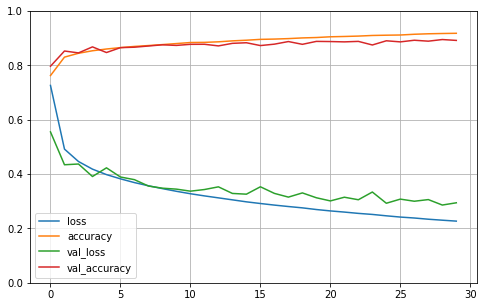

In [21]:
print(history.params)
print(history.epoch)
print(history.history.keys())
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
model.evaluate(X_test/255.0,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8855


[0.32978886365890503, 0.8855000138282776]

In [25]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_pred=model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])
print(y_test[:3])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
[9 2 1]


In [2]:
housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [11]:
X_train.shape

(11610, 8)

In [30]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error",
             optimizer="sgd")
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

mse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)
print(y_pred)
print(y_test[:3])

Epoch 1/20
363/363 [==============================] - ETA: 0s - loss: 1.1856- ETA: 0s - loss: 1.3 - 1s 2ms/step - loss: 1.1678 - val_loss: 0.6026
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5312 - val_loss: 0.4788
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4958 - val_loss: 0.4795
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5568 - val_loss: 0.4766
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4690 - val_loss: 0.4484
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4608 - val_loss: 0.4365
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4375 - val_loss: 0.4308
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4278 - val_loss: 0.4216
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4201 - val_loss: 0.4124
Epoch 10/20
363/363 [==============================] -

<AxesSubplot:>

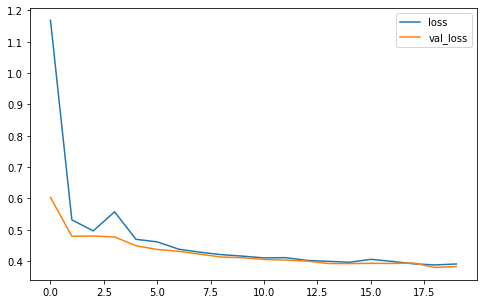

In [31]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [18]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation="relu")(input_)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.Concatenate()([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_],outputs=[output])

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_4[0][0]         

In [13]:
model.compile(loss="mean_squared_error",
             optimizer="adam")
history=model.fit(X_train,y_train,epochs=20,
            validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 2

In [16]:
input_A=keras.layers.Input(shape=[5],name="wide_input")
input_B=keras.layers.Input(shape=[6],name="deep_input")
hidden1=keras.layers.Dense(30,activation="relu")(input_B)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_A,hidden2])
output=keras.layers.Dense(1,name="output")(concat)
model=keras.Model(inputs=[input_A,input_B],outputs=[output])

In [3]:
X_train_A,X_train_B=X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B=X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B=X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B=X_test_A[:3],X_test_B[:3]

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0793 - val_loss: 1.0278
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8058 - val_loss: 0.7673
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6709 - val_loss: 0.6895
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6202 - val_loss: 0.6446
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5880 - val_loss: 0.6131
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5643 - val_loss: 0.5891
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5460 - val_loss: 0.5696
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5319 - val_loss: 0.5548
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5205 - val_loss: 0.5414
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5115 - val_loss: 0.5310

<AxesSubplot:>

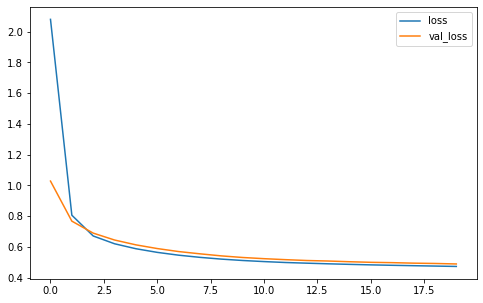

In [17]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))


history=model.fit((X_train_A,X_train_B),y_train,epochs=20,
                 validation_data=((X_valid_A,X_valid_B),y_valid))
mse_test=model.evaluate((X_test_A,X_test_B),y_test)
y_pred=model.predict((X_new_A,X_new_B))
print(mse_test)
print(y_pred)
pd.DataFrame(history.history).plot(figsize=(8,5))

In [18]:
print(y_pred)
print(y_test[:3])

[[1.7068298 ]
 [2.4119208 ]
 [0.61128426]]
[1.65  2.875 0.653]


In [19]:
input_A=keras.layers.Input(shape=[5],name="wide_input")
input_B=keras.layers.Input(shape=[6],name="deep_input")
hidden1=keras.layers.Dense(30,activation="relu")(input_B)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_A,hidden2])
output=keras.layers.Dense(1,name="output")(concat)
aux_output=keras.layers.Dense(1,name="aux_output")(hidden2)
model=keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])

model.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer="sgd")

In [20]:
history=model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,
                 validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))
total_loss,main_loss,aux_loss=model.evaluate([X_test_A,X_test_B],[y_test,y_test])
print("Total loss: {}\nMain loss: {}\nAuxiliary loss: {}".format(total_loss,main_loss,aux_loss))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.1563 - output_loss: 1.0585 - aux_output_loss: 2.0364 - val_loss: 0.6479 - val_output_loss: 0.5845 - val_aux_output_loss: 1.2185
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5833 - output_loss: 0.5325 - aux_output_loss: 1.0409 - val_loss: 0.5579 - val_output_loss: 0.5078 - val_aux_output_loss: 1.0088
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5191 - output_loss: 0.4781 - aux_output_loss: 0.8884 - val_loss: 0.5193 - val_output_loss: 0.4792 - val_aux_output_loss: 0.8806
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5626 - output_loss: 0.5339 - aux_output_loss: 0.8216 - val_loss: 0.5159 - val_output_loss: 0.4805 - val_aux_output_loss: 0.8347
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4766 - output_loss: 0.4472 - aux_output_loss: 0.7411 - val_loss: 0.4925 - val_output_loss: 0.4637 - val_aux_

In [23]:
y_pred_main,y_pred_aux=model.predict([X_new_A,X_new_B])
print(y_pred_main)
print(y_pred_aux)
print(y_test[:3])

[[1.5902019]
 [2.6481204]
 [0.913005 ]]
[[1.6713723]
 [2.4269843]
 [0.8228324]]
[1.65  2.875 0.653]


In [24]:
class WideAndDeepModel(keras.Model):
    def __init__(self,units=30,activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.hidden1=keras.layers.Dense(unit,activation=activation)
        self.hidden2=keras.layers.Dense(unit,activation=activation)
        self.main_output=keras.layers.Dense(1)
        self.aux_output=keras.layers.Dense(1)
        
    def call(self,inputs):
        input_A,input_B=inputs
        hidden1=self.hidden1(input_B)
        hidden2=self.hidden2(hidden1)
        concat=keras.layers.concatenate([input_A,hidden2])
        main_output=self.main_output(concat)
        aux_output=self.aux_output(hidden2)
        return main_output,aux_output
    
model=WideAndDeepModel()


In [25]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 2.4542 - output_1_loss: 2.2397 - output_2_loss: 4.3852 - val_loss: 1.3102 - val_output_1_loss: 1.0745 - val_output_2_loss: 3.4306
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0518 - output_1_loss: 0.8750 - output_2_loss: 2.6427 - val_loss: 0.9520 - val_output_1_loss: 0.8043 - val_output_2_loss: 2.2815
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8209 - output_1_loss: 0.7013 - output_2_loss: 1.8965 - val_loss: 0.8208 - val_output_1_loss: 0.7108 - val_output_2_loss: 1.8105
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7325 - output_1_loss: 0.6364 - output_2_loss: 1.5983 - val_loss: 0.7564 - val_output_1_loss: 0.6600 - val_output_2_loss: 1.6234
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6869 - output_1_loss: 0.5991 - output_2_loss: 1.4772 - val_loss: 0.7187 - val_output_1_loss: 0.6271 - val_ou

In [26]:
input_A=keras.layers.Input(shape=[5],name="wide_input")
input_B=keras.layers.Input(shape=[6],name="deep_input")
hidden1=keras.layers.Dense(30,activation="relu")(input_B)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_A,hidden2])
output=keras.layers.Dense(1,name="output")(concat)
aux_output=keras.layers.Dense(1,name="aux_output")(hidden2)
model=keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])

model.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer="sgd")
history=model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,
                 validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.4657 - output_loss: 1.3713 - aux_output_loss: 2.3151 - val_loss: 1.0847 - val_output_loss: 1.0214 - val_aux_output_loss: 1.6542
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.2897 - output_loss: 1.2396 - aux_output_loss: 1.7405 - val_loss: 0.6583 - val_output_loss: 0.5850 - val_aux_output_loss: 1.3180
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5816 - output_loss: 0.5173 - aux_output_loss: 1.1600 - val_loss: 0.5880 - val_output_loss: 0.5237 - val_aux_output_loss: 1.1665
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5365 - output_loss: 0.4814 - aux_output_loss: 1.0319 - val_loss: 0.5432 - val_output_loss: 0.4894 - val_aux_output_loss: 1.0273
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4985 - output_loss: 0.4519 - aux_output_loss: 0.9183 - val_loss: 0.5123 - val_output_loss: 0.4668 - val_aux_

In [27]:
model.save("my_keras_model.h5")

In [28]:
model=keras.models.load_model("my_keras_model.h5")

In [30]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                             save_best_only=True)
history=model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=10,
                 validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]),
                 callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3358 - output_loss: 0.3216 - aux_output_loss: 0.4640 - val_loss: 0.3598 - val_output_loss: 0.3466 - val_aux_output_loss: 0.4785
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3354 - output_loss: 0.3217 - aux_output_loss: 0.4592 - val_loss: 0.3702 - val_output_loss: 0.3568 - val_aux_output_loss: 0.4910
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3323 - output_loss: 0.3186 - aux_output_loss: 0.4551 - val_loss: 0.3588 - val_output_loss: 0.3459 - val_aux_output_loss: 0.4749
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3322 - output_loss: 0.3186 - aux_output_loss: 0.4538 - val_loss: 0.3668 - val_output_loss: 0.3551 - val_aux_output_loss: 0.4718
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3322 - output_loss: 0.3193 - aux_output_loss: 0.4490 - val_loss: 0.3561 - val_output_loss: 0.3437 - val_aux_

In [31]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,
                                               restore_best_weights=True)
history=model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=10,
                 validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]),
                 callbacks=[checkpoint_cb,early_stopping_cb ])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3252 - output_loss: 0.3133 - aux_output_loss: 0.4321 - val_loss: 0.3507 - val_output_loss: 0.3398 - val_aux_output_loss: 0.4486
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3249 - output_loss: 0.3134 - aux_output_loss: 0.4283 - val_loss: 0.3649 - val_output_loss: 0.3535 - val_aux_output_loss: 0.4675
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3225 - output_loss: 0.3111 - aux_output_loss: 0.4252 - val_loss: 0.3485 - val_output_loss: 0.3380 - val_aux_output_loss: 0.4427
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3224 - output_loss: 0.3111 - aux_output_loss: 0.4242 - val_loss: 0.3598 - val_output_loss: 0.3503 - val_aux_output_loss: 0.4460
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3226 - output_loss: 0.3117 - aux_output_loss: 0.4212 - val_loss: 0.3472 - val_output_loss: 0.3367 - val_aux_

In [34]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        print("\nval/train:{:.2f}".format(logs["val_loss"]/logs["loss"]))
        
pnt_ratio_cb=PrintValTrainRatioCallback()
history=model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=10,
                 validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]),
                 callbacks=[checkpoint_cb,early_stopping_cb, pnt_ratio_cb ])

Epoch 1/10
344/363 [===========================>..] - ETA: 0s - loss: 0.3187 - output_loss: 0.3085 - aux_output_loss: 0.4110
val/train:1.09
363/363 [==============================] - 1s 2ms/step - loss: 0.3174 - output_loss: 0.3072 - aux_output_loss: 0.4087 - val_loss: 0.3445 - val_output_loss: 0.3351 - val_aux_output_loss: 0.4283
Epoch 2/10
356/363 [============================>.] - ETA: 0s - loss: 0.3172 - output_loss: 0.3074 - aux_output_loss: 0.4054
val/train:1.13
363/363 [==============================] - 1s 2ms/step - loss: 0.3173 - output_loss: 0.3075 - aux_output_loss: 0.4059 - val_loss: 0.3584 - val_output_loss: 0.3487 - val_aux_output_loss: 0.4457
Epoch 3/10
362/363 [============================>.] - ETA: 0s - loss: 0.3151 - output_loss: 0.3052 - aux_output_loss: 0.4036
val/train:1.08
363/363 [==============================] - 1s 2ms/step - loss: 0.3149 - output_loss: 0.3051 - aux_output_loss: 0.4032 - val_loss: 0.3409 - val_output_loss: 0.3319 - val_aux_output_loss: 0.4224
E

In [62]:
root_logdir=os.path.join(os.curdir,"my_logs")

def get_run_logdir():
    run_id=time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

run_logdir=get_run_logdir()

In [39]:
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
history=model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=10,
                 validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]),
                 callbacks=[tensorboard_cb])

Epoch 1/10
  1/363 [..............................] - ETA: 0s - loss: 0.2532 - output_loss: 0.2480 - aux_output_loss: 0.3005WARNING:tensorflow:From C:\Users\Daniel\anaconda3\envs\py37ml\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 3ms/step - loss: 0.3114 - output_loss: 0.3022 - aux_output_loss: 0.3936 - val_loss: 0.3394 - val_output_loss: 0.3311 - val_aux_output_loss: 0.4141
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3114 - output_loss: 0.3025 - aux_output_loss: 0.3912 - val_loss: 0.3530 - val_output_loss: 0.3445 - val_aux_output_loss: 0.4290
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3091 - output_loss: 0.3002 - aux_output_loss: 0.3892 - val_loss: 0.3374 - val_output_loss: 0.3293 - val_aux_

In [40]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 4432.

In [6]:
def build_model(n_hidden=1,n_neurons=30,learning_rate=3e-3,input_shape=[8]):
    model=keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer=keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse",optimizer=optimizer)
    return model

keras_reg=keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train,y_train,epochs=100,
             validation_data=(X_valid,y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test=keras_reg.score(X_test,y_test)
y_pred=keras_reg.predict(X_test[:3])
print(mse_test)
print(y_pred)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1461 - val_loss: 0.6834
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5648 - val_loss: 0.6014
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4927 - val_loss: 0.5004
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4469 - val_loss: 0.5548
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4261 - val_loss: 0.4480
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4137 - val_loss: 0.4685
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4060 - val_loss: 0.4472
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3986 - val_loss: 0.4383
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3918 - val_loss: 0.4173
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3865 - val_lo

In [19]:
param_distribs={
    "n_hidden":[0,1,2,3],
    "n_neurons":list(range(1,100)),
    "learning_rate":[3e-4,3e-3,3e-2]
}

rnd_search_cv=RandomizedSearchCV(keras_reg,param_distribs,n_iter=10,cv=3)
rnd_search_cv.fit(X_train,y_train,epochs=30,
                 validation_data=(X_valid,y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=5)],
                 batch_size=256,
                 verbose=0)

121/121 [==============================] - 0s 991us/step - loss: 0.3626


RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000029359C67048>,
                   param_distributions={'learning_rate': [0.0003, 0.003, 0.03],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...]})

In [20]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
model=rnd_search_cv.best_estimator_.model

{'n_neurons': 55, 'n_hidden': 2, 'learning_rate': 0.03}
-0.36600056290626526


In [3]:
"""10. Train a deep MLP on the MNIST dataset (you can load it using keras.data
sets.mnist.load_data(). See if you can get over 98% precision. Try searching
for the optimal learning rate by using the approach presented in this chapter (i.e.,
by growing the learning rate exponentially, plotting the loss, and finding the
point where the loss shoots up). Try adding all the bells and whistles—save
checkpoints, use early stopping, and plot learning curves using TensorBoard.
"""

(X_train_full,y_train_full),(X_test,y_test)=keras.datasets.mnist.load_data()

X_train_full, X_test=(X_train_full/255.0, X_test/255.0)

X_valid,y_valid=(X_train_full[:5000],y_train_full[:5000])
X_train,y_train=(X_train_full[5000:],y_train_full[5000:])
print(X_train.shape)
print(y_train.shape)

(55000, 28, 28)
(55000,)


Epoch 1/100
   1/1719 [..............................] - ETA: 1s - loss: 2.2551 - accuracy: 0.1250WARNING:tensorflow:From C:\Users\Daniel\anaconda3\envs\py37ml\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2894 - accuracy: 0.1613 - val_loss: 2.2874 - val_accuracy: 0.1600
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2759 - accuracy: 0.1719 - val_loss: 2.2739 - val_accuracy: 0.1702
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2628 - accuracy: 0.1841 - val_loss: 2.2609 - val_accuracy: 0.1816
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2501 - accuracy: 0.1967 - val_loss: 2.2482 - val_accuracy: 0.1972
Epoch 5/100
1719/1719 [================

Epoch 53/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.7050 - accuracy: 0.6519 - val_loss: 1.6960 - val_accuracy: 0.6524
Epoch 54/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.6938 - accuracy: 0.6543 - val_loss: 1.6847 - val_accuracy: 0.6552
Epoch 55/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.6827 - accuracy: 0.6575 - val_loss: 1.6734 - val_accuracy: 0.6564
Epoch 56/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.6715 - accuracy: 0.6605 - val_loss: 1.6621 - val_accuracy: 0.6580
Epoch 57/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.6603 - accuracy: 0.6628 - val_loss: 1.6508 - val_accuracy: 0.6608
Epoch 58/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.6492 - accuracy: 0.6657 - val_loss: 1.6395 - val_accuracy: 0.6652
Epoch 59/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.6381 - accuracy: 0.6683 - val_loss: 1.6283 -

1719/1719 [==============================] - 3s 2ms/step - loss: 0.3946 - accuracy: 0.8920 - val_loss: 0.3791 - val_accuracy: 0.8978
Epoch 64/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3920 - accuracy: 0.8925 - val_loss: 0.3767 - val_accuracy: 0.8990
Epoch 65/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3896 - accuracy: 0.8931 - val_loss: 0.3741 - val_accuracy: 0.8994
Epoch 66/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3872 - accuracy: 0.8934 - val_loss: 0.3717 - val_accuracy: 0.9002
Epoch 67/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3848 - accuracy: 0.8941 - val_loss: 0.3694 - val_accuracy: 0.9006
Epoch 68/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3825 - accuracy: 0.8945 - val_loss: 0.3671 - val_accuracy: 0.9014
Epoch 69/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3803 - accuracy: 0.8947 - val_loss: 0.3649 - val_accuracy

1719/1719 [==============================] - 3s 2ms/step - loss: 0.1302 - accuracy: 0.9634 - val_loss: 0.1328 - val_accuracy: 0.9638
Epoch 74/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1290 - accuracy: 0.9635 - val_loss: 0.1317 - val_accuracy: 0.9640
Epoch 75/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1277 - accuracy: 0.9635 - val_loss: 0.1304 - val_accuracy: 0.9638
Epoch 76/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1265 - accuracy: 0.9644 - val_loss: 0.1291 - val_accuracy: 0.9648
Epoch 77/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1252 - accuracy: 0.9646 - val_loss: 0.1287 - val_accuracy: 0.9644
Epoch 78/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1240 - accuracy: 0.9648 - val_loss: 0.1273 - val_accuracy: 0.9648
Epoch 79/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1228 - accuracy: 0.9651 - val_loss: 0.1267 - val_accuracy

1719/1719 [==============================] - 3s 2ms/step - loss: 1.5692 - accuracy: 0.3653 - val_loss: 1.7609 - val_accuracy: 0.2776
Epoch 10/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.8737 - accuracy: 0.2217 - val_loss: 1.9218 - val_accuracy: 0.1986
Epoch 11/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.8902 - accuracy: 0.1901 - val_loss: 1.8357 - val_accuracy: 0.2010
Epoch 12/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.8549 - accuracy: 0.1978 - val_loss: 1.8376 - val_accuracy: 0.2164
Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 13124170024359771583731554320384.0000 - accuracy: 0.1011 - val_loss: 2.4872 - val_accuracy: 0.112635808.0000 - a - ETA: 2s - loss: 500158917800
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 2.4720 - accuracy: 0.1012 - val_loss: 2.4489 - val_accuracy: 0.1126
Epoch 3/100
1719/1719 [==============================] - 3s 2ms

'param_grid={"learning_rate":[1e-5,1e-4,1e-3,1e-2,1e-1,1,10]}\ngrid=GridSearchCV(mnist_model_keras,param_grid,cv=3)\n\n\n\ngrid.fit(X_train,y_train,epochs=100,verbose=0,\n        callbacks=[early_stopping_cb,checkpoint_cb],\n        validation_data=(X_valid,y_valid))'

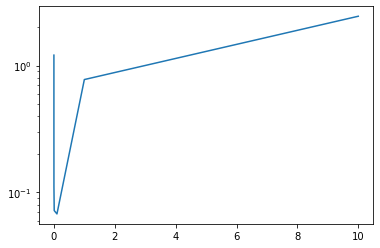

In [22]:
def mnist_model(n_hidden=2,n_neurons=200,learning_rate=1e-3,input_shape=[28,28],activation="relu"):
    model=keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation=activation))
    model.add(keras.layers.Dense(10,activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
                 metrics=["accuracy"])
    return model

mnist_model_keras=keras.wrappers.scikit_learn.KerasClassifier(mnist_model)

early_stopping_cb=keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb=keras.callbacks.ModelCheckpoint("mnist_model_keras.h5")

run_logdir=get_run_logdir()
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)

validation_losses=[]
cce=keras.losses.SparseCategoricalCrossentropy()
for learning_rate in [1e-5,1e-4,1e-3,1e-2,1e-1,1,10]:
    model=mnist_model(learning_rate=learning_rate)
    history=model.fit(X_train,y_train,epochs=100,
             validation_data=(X_valid,y_valid),
             callbacks=[early_stopping_cb,checkpoint_cb,tensorboard_cb])
    y_pred=model.predict(X_valid)
    validation_losses.append(cce(y_valid,y_pred))

plt.plot([1e-5,1e-4,1e-3,1e-2,1e-1,1,10],validation_losses)
plt.yscale("log")

"""param_grid={"learning_rate":[1e-5,1e-4,1e-3,1e-2,1e-1,1,10]}
grid=GridSearchCV(mnist_model_keras,param_grid,cv=3)



grid.fit(X_train,y_train,epochs=100,verbose=0,
        callbacks=[early_stopping_cb,checkpoint_cb],
        validation_data=(X_valid,y_valid))"""

Text(0, 0.5, 'Loss - crossentropy')

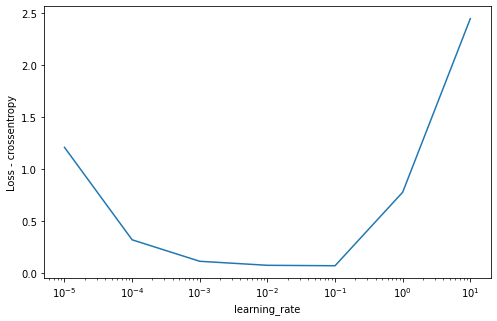

In [24]:
plt.figure(figsize=(8,5))
plt.plot([1e-5,1e-4,1e-3,1e-2,1e-1,1,10],validation_losses)
plt.xscale("log")
plt.xlabel("learning_rate")
plt.ylabel("Loss - crossentropy")

In [5]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [70]:
def mnist_model_2(n_hidden=2,n_neurons=200,learning_rate=1e-3,input_shape=[28,28],activation="selu"):
    model=keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation=activation,kernel_initializer="lecun_normal"))
    model.add(keras.layers.Dense(10,activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
                 metrics=["accuracy"])
    return model

model=mnist_model_2(n_hidden=2,activation="selu",learning_rate=1e-3)
exp_lr_cb=ExponentialLearningRate(factor=1.005)

history=model.fit(X_train,y_train,epochs=1,validation_data=(X_valid,y_valid),
                 callbacks=[exp_lr_cb])

1719/1719 [==============================] - 4s 2ms/step - loss: 224791.1094 - accuracy: 0.5459 - val_loss: 5582.9629 - val_accuracy: 0.1100


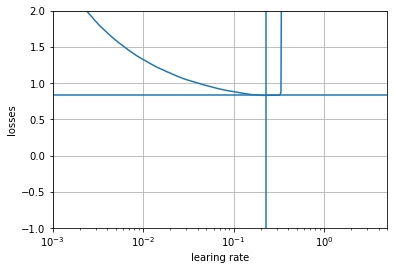

In [71]:
plt.plot(exp_lr_cb.rates,exp_lr_cb.losses)
plt.xscale("log")
plt.xlabel("learing rate")
plt.ylabel("losses")
plt.xlim(1e-3,5)
plt.ylim(-1,2)
plt.hlines(min(exp_lr_cb.losses),min(exp_lr_cb.rates),max(exp_lr_cb.rates))
plt.vlines(exp_lr_cb.rates[exp_lr_cb.losses.index(min(exp_lr_cb.losses))],-1,5)
plt.grid()

In [72]:
#po 0.226 loss zaczyna szybko sie piac w górę wiec optymalna jest polowa z 0.22 czyli ok 0.1
max_rate=exp_lr_cb.rates[exp_lr_cb.losses.index(min(exp_lr_cb.losses))]
max_rate

0.22620736

In [73]:
model=mnist_model_2(n_hidden=2,activation="selu",learning_rate=0.1)

early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
checkpoint_cb=keras.callbacks.ModelCheckpoint("fashion_mnist_model_keras.h5")

run_logdir=get_run_logdir()
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
history=model.fit(X_train,y_train,epochs=200,validation_data=(X_valid,y_valid),
                 callbacks=[early_stopping_cb,checkpoint_cb,tensorboard_cb])

Epoch 1/200
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3269 - accuracy: 0.9020 - val_loss: 0.1932 - val_accuracy: 0.9476
Epoch 2/200
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1660 - accuracy: 0.9497 - val_loss: 0.1595 - val_accuracy: 0.9548
Epoch 3/200
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1155 - accuracy: 0.9647 - val_loss: 0.1124 - val_accuracy: 0.9688
Epoch 4/200
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0924 - accuracy: 0.9710 - val_loss: 0.1416 - val_accuracy: 0.9584
Epoch 5/200
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0755 - accuracy: 0.9762 - val_loss: 0.1171 - val_accuracy: 0.9634
Epoch 6/200
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0623 - accuracy: 0.9799 - val_loss: 0.1148 - val_accuracy: 0.9686
Epoch 7/200
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0540 - accuracy: 0.9825 - val_loss: 0.0893 - val_ac